In [ ]:
# Songbird species that display more-complex vocal
# learning are better problem-solvers and have
# larger brains

In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/Users/williamwood/Downloads/doi_10.5061_dryad.tb2rbp06n__v4/Audet_Science_2023_dataset.txt', delimiter = "\t")


In [5]:
print(data.columns)
print(Counter(data['sp_common']))
# 'American redstart': 2, 'Cedar waxwing': 2, 'Red-winged blackbird': 2, 'Yellow warbler': 1, 'Song sparrow': 1, 'Veery': 1, 'Northern cardinal': 1, 'Mourning dove': 1}

Index(['species', 'animal', 'sp_common', 'bird_ID', 'captive_status', 'sex',
       'Location', 'Food_deprivation_time', 'Shyness', 'Neophobia', 'tPS1234',
       'lPS1234', 'tDetour_reaching', 'lDetour_reaching', 'tLearning',
       'lLearning', 'tReversal_learning', 'lReversal_learning', 'Bodyweight',
       'Relative_brain_size', 'Call_rep', 'lCall_rep', 'Song_rep', 'lSong_rep',
       'SongCall_rep', 'lSongCall_rep', 'VLC', 'VLTnum', 'OCnum', 'OCsongnum',
       'Mnum', 'VLT'],
      dtype='object')
Counter({'Black-capped chickadee': 19, 'European starling': 16, 'Gray catbird': 15, 'Brown-headed cowbird': 14, 'House wren': 13, 'American goldfinch': 13, 'Eastern phoebe': 13, 'White-breasted nuthatch': 13, 'Tufted titmouse': 13, 'Canary': 13, 'Blue Jay': 13, 'Chipping sparrow': 12, 'Zebra finch': 12, 'White-throated sparrow': 12, 'American robin': 12, 'American redstart': 2, 'Cedar waxwing': 2, 'Red-winged blackbird': 2, 'Yellow warbler': 1, 'Song sparrow': 1, 'Veery': 1, 'Northern c

Text(0, 0.5, '# of tries to solve the puzzle')

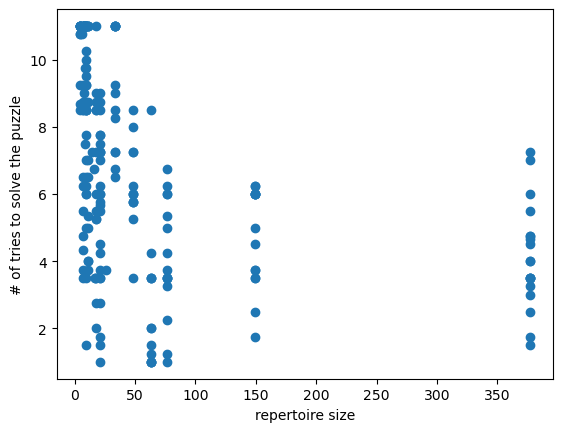

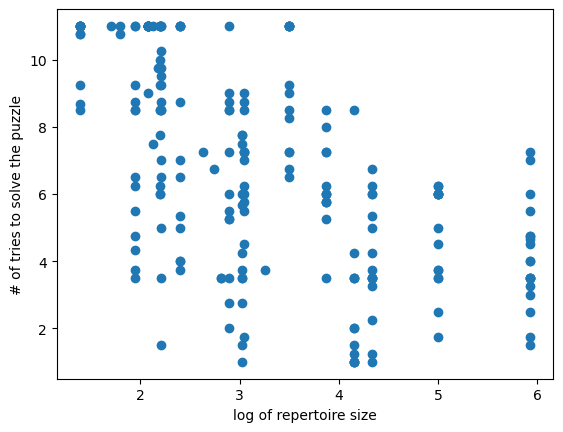

In [6]:
plt.figure()
plt.plot(data['SongCall_rep'], data['tPS1234'],'o')
plt.xlabel('repertoire size')
plt.ylabel('# of tries to solve the puzzle')
plt.figure()
plt.plot(np.log(data['SongCall_rep']), data['tPS1234'],'o')
plt.xlabel('log of repertoire size')
plt.ylabel('# of tries to solve the puzzle')

In [28]:
# ideally we calculate means and stdv per species and plot that
species_means = list()
summary_df = pd.DataFrame(columns = ['species', 'mean', 'stdv', 'rep'])
# species = data['sp_common'].unique()
for species in data['sp_common'].unique():
    nums = list()
    for row_num in range(len(data)):
        # print(f'row: {row_num}')
        if data.iloc[row_num]['sp_common'] == species:
            nums.append(data.iloc[row_num]['tPS1234'])
            rep = data.iloc[row_num]['SongCall_rep']
        if row_num == len(data)-1:
            # species_means.append(zip(species, np.mean(nums), np.std(nums)))
            summary_df = summary_df.append({'species': species, 'mean': np.mean(nums), 'stdv': np.std(nums), 'rep': rep}, ignore_index=True)
            print(f'species: {species}')

species: Chipping sparrow
species: Black-capped chickadee
species: Yellow warbler
species: House wren
species: American redstart
species: Song sparrow
species: American goldfinch
species: Zebra finch
species: Eastern phoebe
species: White-breasted nuthatch
species: Gray catbird
species: Cedar waxwing
species: Veery
species: Tufted titmouse
species: White-throated sparrow
species: Brown-headed cowbird
species: Canary
species: American robin
species: Northern cardinal
species: Mourning dove
species: Blue Jay
species: Red-winged blackbird
species: European starling


/var/folders/s4/0pb__4_s30s067z6pcyln44h0000gn/T/ipykernel_45846/535548449.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'species': species, 'mean': np.mean(nums), 'stdv': np.std(nums), 'rep': rep}, ignore_index=True)
/var/folders/s4/0pb__4_s30s067z6pcyln44h0000gn/T/ipykernel_45846/535548449.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'species': species, 'mean': np.mean(nums), 'stdv': np.std(nums), 'rep': rep}, ignore_index=True)
/var/folders/s4/0pb__4_s30s067z6pcyln44h0000gn/T/ipykernel_45846/535548449.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'species': species, 'mean': np.mean(nums), 'stdv': np.std(n

In [29]:
summary_df

,species,mean,stdv,rep
0,Chipping sparrow,10.410000,0.943804,4.00
1,Black-capped chickadee,4.127368,1.512286,377.50
2,Yellow warbler,6.750000,0.000000,15.55
3,House wren,9.057692,1.715747,33.00
4,American redstart,9.250000,1.750000,8.35
5,Song sparrow,7.250000,0.000000,13.88
6,American goldfinch,7.044615,2.521683,7.00
7,Zebra finch,8.854167,1.924238,9.00
8,Eastern phoebe,10.846154,0.532939,8.00
9,White-breasted nuthatch,6.403846,2.597222,18.00


<ErrorbarContainer object of 3 artists>

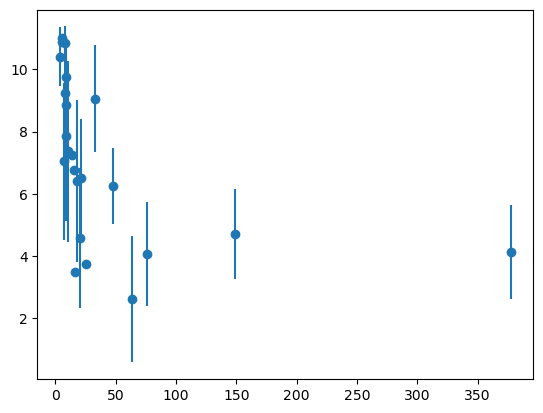

In [40]:
plt.errorbar(summary_df['rep'], summary_df['mean'], summary_df['stdv'], fmt='o')


Text(0, 0.5, 'mean # of tries to solve the puzzle')

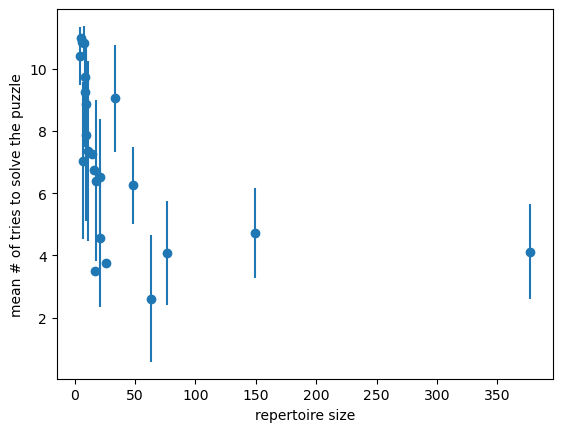

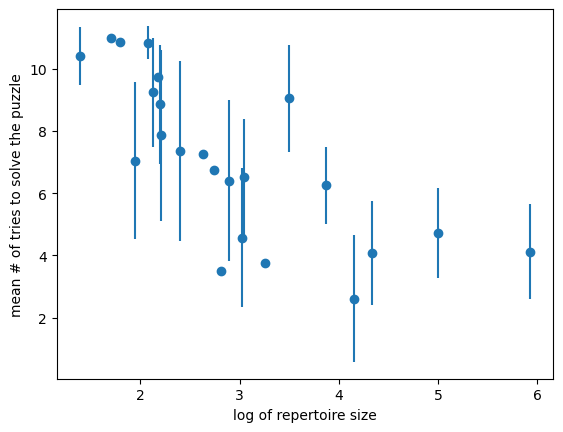

In [43]:
# plot the mean tPS1234 vs the mean repertoire size, by species

plt.figure()
plt.errorbar(summary_df['rep'], summary_df['mean'], summary_df['stdv'], fmt='o')
plt.xlabel('repertoire size')
plt.ylabel('mean # of tries to solve the puzzle')
plt.figure()
plt.errorbar(np.log(summary_df['rep']), summary_df['mean'], summary_df['stdv'], fmt='o')
plt.xlabel('log of repertoire size')
plt.ylabel('mean # of tries to solve the puzzle')


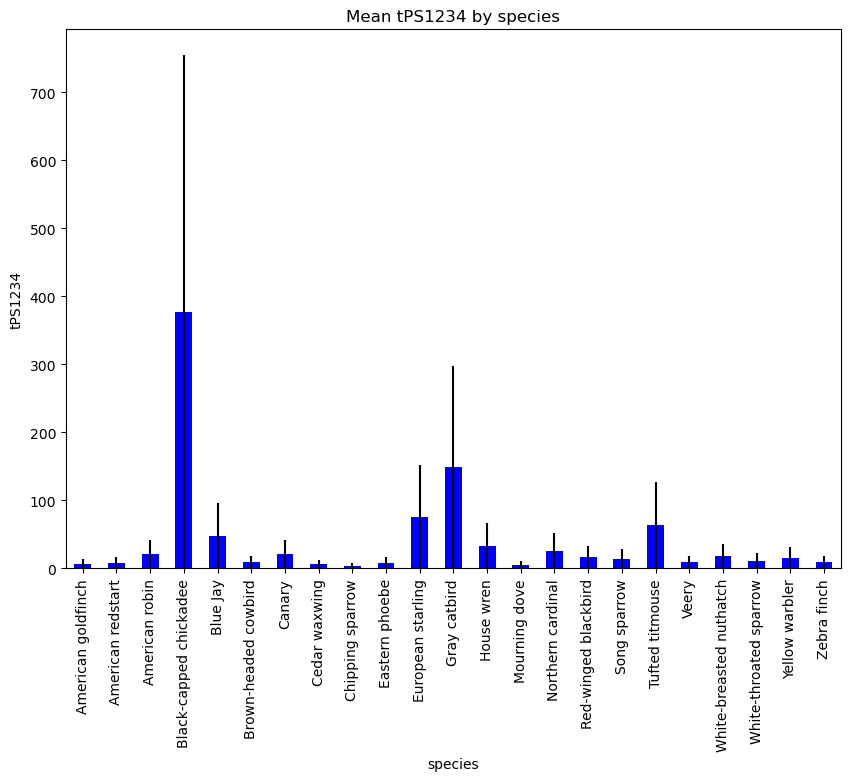

AttributeError: 'AxesSubplot' object has no attribute 'set_'

In [32]:
# plot the mean tPS1234 vs the mean repertoire size, by species
by_species = data.groupby('sp_common').agg({'tPS1234': ['mean', 'std']})
repertoire = data.groupby('sp_common').agg({'SongCall_rep': 'mean'})
avg_rep = repertoire['SongCall_rep']
std_rep = repertoire['SongCall_rep']
# avg_rep = by_species['tPS1234']['mean']
# std_rep = by_species['tPS1234']['std']
p = avg_rep.plot(kind='bar', yerr=std_rep, legend=False, figsize=(10,7), color="blue")
p.set_ylabel("tPS1234")
p.set_xlabel("species")
p.set_title("Mean tPS1234 by species")
plt.show()



# p = avg_rep.plot(kind='bar', yerr=std_rep, legend=False, figsize=(10,7), color="blue")
p.set_